Import libraries

In [2]:
import pandas as pd
import numpy as np
from math import sqrt 
import matplotlib
import matplotlib.pyplot as plt
import latexify as lt

Latexify Code

Function Definition

In [3]:
def bland_altman(csv_file_paths:list, titles:list=['FVC', 'FEV$_1$', 'PEF'], labels:list=['Healthy', 'Not Healthy'], column_names:list = ['x', 'y'], log_transform:bool = False, save_fig:str = None):
  """
  Function to create a Bland-Altman plot 

  Args:
    csv_file_paths: list of str
      File paths of the csv files containing the data. Each csv file should
      contain 2 columns - one for each method.

    titles: list of str, default: ['FVC', 'FEV$_1$', 'PEF']
      Titles for the 3 subplots

    labels: list of str, default: ['Healthy', 'Not Healthy']
      labels for the 2 traces

    column_names: list of str, default: ['x', 'y']
      Names to be used for the columns in the csv files. The first column is x
      and second column is y by default.

    log_transform: bool, default: False
      Whether to use log transformation (base 2) of the measurements before the 
      analysis 

    save_fig: str, default: None
      path to save image in, does not save if None

  Returns:
    None
  """
  fig, ax = plt.subplots(nrows=1, ncols=3)

  for title, h in zip(titles, range(3)):
    for k, path in enumerate(csv_file_paths[h*2:h*2+2]):
      data = pd.read_csv(path, header=0, names=column_names)

      # use log transformation on data if log_transform is True
      if log_transform:
        data['x'] = np.log2(data['x'])
        data['y'] = np.log2(data['y'])

      averages = (data['x'] + data['y'])/2
      differences = data['x'] - data['y']

      # add the Bland-Altman plot to the figure
      ax[h].scatter(x=averages, y=differences, label=labels[k], 
                color='C'+str(k))
      
      # add mean and +/- 1.96*SD lines only for the first file
      if k == 0:
        average_difference = differences.mean()
        sd_difference = differences.std()
        
        # add mean of the differences to the figure
        ax[h].axhline(y=average_difference,
                  label='mean', color='k', alpha=0.8)
        
        # add mean + 1.96*SD of the differences to the figure
        ax[h].axhline(y=average_difference + 1.96*sd_difference,
                  linestyle='dashed',
                  label='+1.96SD', color='k', alpha=0.8)
        
        # add mean - 1.96*SD of the differences to the figure
        ax[h].axhline(y=average_difference - 1.96*sd_difference,
                  linestyle='dashed',
                  label='-1.96SD', color='k', alpha=0.8)
    
    # update titles, set legend
    ax[h].set_title(title)
    if h != 2: 
        ax[h].set_xlabel('Average of the 2 methods (L)')
    else:
        ax[h].set_xlabel('Average of the 2 methods (L/s)')
    # update y-axis title only for first subplot
    if h == 0:
      ax[h].set_ylabel('Difference between the 2 methods')
    # add legend for middle subplot
    if h == 1:
      ax[h].legend(loc='upper center', bbox_to_anchor=(0.5, 1.35), ncol=5)
    ax[h].set_ylim([-1,1])
    lt.format_axes(ax[h])
    

  plt.subplots_adjust(wspace=0.3)
  if save_fig is None:
    plt.show()
  else:
    plt.savefig(save_fig, bbox_inches='tight')


Test on random data

C:\ProgramData\Anaconda3\lib\_collections_abc.py:841: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


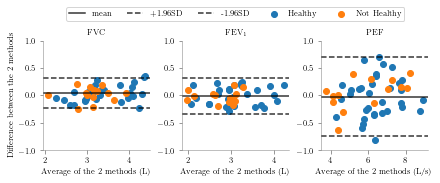

In [4]:
# for i in range(2):
#   x = np.sort(np.random.exponential(size=50))
#   y = np.sort(np.random.exponential(size=50))
#   pd.DataFrame({'x':x, 'y':y}).to_csv('exponential_%s.csv' %str(i), index=False)

lt.latexify(columns=2, fig_height=2)
# pass only one file name in the list if you only 
# want to plot one file in each figure
bland_altman(['result-FVC-Cloth-Healthy.csv', 'result-FVC-Cloth-Not-Healthy.csv', 
            'result-FEV1-Cloth-Healthy.csv', 'result-FEV1-Cloth-Not-Healthy.csv',
            'result-PEF-Cloth-Healthy.csv', 'result-PEF-Cloth-Not-Healthy.csv'], 
            log_transform=False, 
            save_fig='BlandAltman-Cloth.pdf') 

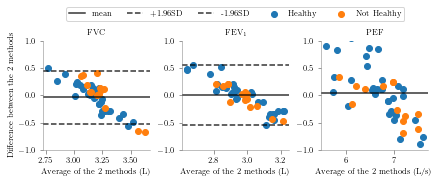

In [5]:
# for i in range(2):
#   x = np.sort(np.random.exponential(size=50))
#   y = np.sort(np.random.exponential(size=50))
#   pd.DataFrame({'x':x, 'y':y}).to_csv('exponential_%s.csv' %str(i), index=False)

lt.latexify(columns=2, fig_height=2)
# pass only one file name in the list if you only 
# want to plot one file in each figure
bland_altman(['n95-ba/result-FVC-N95-Healthy.csv', 'n95-ba/result-FVC-N95-Not-Healthy.csv', 
            'n95-ba/result-FEV1-N95-Healthy.csv', 'n95-ba/result-FEV1-N95-Not-Healthy.csv',
            'n95-ba/result-PEF-N95-Healthy.csv', 'n95-ba/result-PEF-N95-Not-Healthy.csv'], 
            log_transform=False, 
            save_fig='BlandAltman-N95.pdf') 

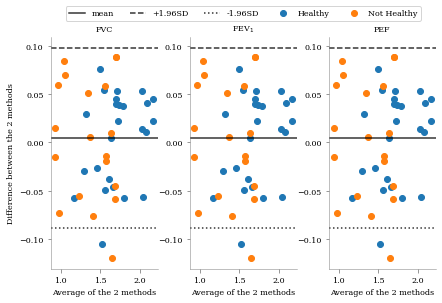

In [5]:
# won't plot points corresponding to negative values due to taking log
bland_altman(['result-FVC-Cloth-Healthy.csv', 'result-FVC-Cloth-Not-Healthy.csv', 
            'result-FVC-Cloth-Healthy.csv', 'result-FVC-Cloth-Not-Healthy.csv',
            'result-FVC-Cloth-Healthy.csv', 'result-FVC-Cloth-Not-Healthy.csv'], 
            log_transform=True, 
            save_fig='BlandAltman_log.png')